In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#load the dataset
data = pd.read_csv(r"C:\Users\User\Desktop\Ezra - My docs\Analysis\Python Datasets\World Bank\Data.csv")
data.head(2)

,Country Name,Country Code,Series Name,Series Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Kenya,KEN,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,..,..,..,..,..,..,...,2780,3040,3390,3970,4230,4500,4720,4660,5130,..
1,Kenya,KEN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,..,..,..,..,..,..,...,3147.949284,3421.245961,3763.763686,4025.841747,4312.908917,4571.478085,4795.403612,4744.739268,5211.170533,..


In [4]:
#droppping the series code column
data.drop('Series Code', axis = 1, inplace = True)

In [5]:
# Renaming the years columns
col_name = data.iloc[:, -50:].columns
cols = [cols.split('[')[1].strip('YR').strip(']') for cols in col_name]
years = data.iloc[:, -50:]
years.columns = cols
years.head()

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,..,..,..,..,..,..,..,..,..,..,...,2780,3040,3390,3970,4230,4500,4720,4660,5130,..
1,..,..,..,..,..,..,..,..,..,..,...,3147.949284,3421.245961,3763.763686,4025.841747,4312.908917,4571.478085,4795.403612,4744.739268,5211.170533,..
2,..,..,..,..,..,..,..,..,..,..,...,1.76969E+11,1.85853E+11,1.95086E+11,2.03306E+11,2.11109E+11,2.23032E+11,2.34438E+11,2.33852E+11,2.51431E+11,..
3,..,..,..,..,..,..,..,..,..,..,...,1.41004E+11,1.56802E+11,1.76338E+11,1.92816E+11,2.11109E+11,2.2836E+11,2.44333E+11,2.46659E+11,2.76221E+11,..
4,..,..,..,..,..,..,..,..,..,..,...,1.246E+11,1.39107E+11,1.58922E+11,1.90213E+11,2.07092E+11,2.24916E+11,2.40426E+11,2.42407E+11,2.72076E+11,..


In [6]:
#converting the columns into numeric
for col in years.columns:
    years[col] = pd.to_numeric(years[col], errors='coerce').astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_1732\1510145690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years[col] = pd.to_numeric(years[col], errors='coerce').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_1732\1510145690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years[col] = pd.to_numeric(years[col], errors='coerce').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_1732\1510145690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [7]:
#Selecting the remaining columns
data2 = data[['Country Name', 'Country Code', 'Series Name']]

In [8]:
#Merging dataset
w_data = pd.concat([data2, years], axis = 1)
w_data.head(2)

,Country Name,Country Code,Series Name,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kenya,KEN,"GNI per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2780.000000,3040.000000,3390.000000,3970.000000,4230.000000,4500.000000,4720.000000,4660.000000,5130.000000,NaN
1,Kenya,KEN,"GDP per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.949284,3421.245961,3763.763686,4025.841747,4312.908917,4571.478085,4795.403612,4744.739268,5211.170533,NaN


In [21]:
#Selecting countries
w_data_countries = w_data.iloc[0:4774]
w_data_countries.head()

,Country Name,Country Code,Series Name,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kenya,KEN,"GNI per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.780000e+03,3.040000e+03,3.390000e+03,3.970000e+03,4.230000e+03,4.500000e+03,4.720000e+03,4.660000e+03,5.130000e+03,NaN
1,Kenya,KEN,"GDP per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.147949e+03,3.421246e+03,3.763764e+03,4.025842e+03,4.312909e+03,4.571478e+03,4.795404e+03,4.744739e+03,5.211171e+03,NaN
2,Kenya,KEN,"GDP, PPP (constant 2017 international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.769690e+11,1.858530e+11,1.950860e+11,2.033060e+11,2.111090e+11,2.230320e+11,2.344380e+11,2.338520e+11,2.514310e+11,NaN
3,Kenya,KEN,"GDP, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.410040e+11,1.568020e+11,1.763380e+11,1.928160e+11,2.111090e+11,2.283600e+11,2.443330e+11,2.466590e+11,2.762210e+11,NaN
4,Kenya,KEN,"GNI, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.246000e+11,1.391070e+11,1.589220e+11,1.902130e+11,2.070920e+11,2.249160e+11,2.404260e+11,2.424070e+11,2.720760e+11,NaN


In [10]:
#indexing the rest of the data
w_data_others = w_data.iloc[4775:]
w_data_others.head()

,Country Name,Country Code,Series Name,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4775,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.333521e+03,3.470551e+03,3.498125e+03,3.591100e+03,3.635565e+03,3.724868e+03,3.777972e+03,3.621058e+03,3.839470e+03,NaN
4776,Africa Eastern and Southern,AFE,"GDP, PPP (constant 2017 international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040660e+12,2.126250e+12,2.195260e+12,2.252720e+12,2.315450e+12,2.379260e+12,2.434570e+12,2.367420e+12,2.472910e+12,NaN
4777,Africa Eastern and Southern,AFE,"GDP, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.893080e+12,2.025590e+12,2.098900e+12,2.213470e+12,2.300390e+12,2.420260e+12,2.520820e+12,2.480830e+12,2.699060e+12,NaN
4778,Africa Eastern and Southern,AFE,"GNI, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.818530e+12,1.953200e+12,2.029310e+12,2.154920e+12,2.229490e+12,2.341470e+12,2.441760e+12,2.410930e+12,2.614130e+12,NaN
4779,Africa Eastern and Southern,AFE,"GNI, PPP (constant 2017 international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.948770e+12,2.040370e+12,2.112610e+12,2.184040e+12,2.233140e+12,2.277570e+12,2.320120e+12,2.259240e+12,2.350570e+12,NaN


In [11]:
#selecting income categories from the data
w_income = w_data_others[w_data_others['Country Name'].isin(['High income', 
                               'Low & middle income', 
                               'Low income',
                               'Lower middle income',
                               'Middle income',
                               'Upper middle income'])]

# Analysing the Fertility rate

In [12]:
#Selecting fertility rate
w_income_fert = w_income[w_income['Series Name'].isin(['Fertility rate, total (births per woman)'])]

In [13]:
#Dropping unwanted columns
w_income_fert = w_income_fert.drop(['Country Code', 'Series Name'], axis = 1)

In [14]:
#setting the column as index
w_income_fert.set_index('Country Name', inplace = True)

In [15]:
#Dropping unwanted rows
w_income_fert.drop('Low & middle income', axis = 0, inplace =True)

In [130]:
w_income_fert.to_clipboard('excel')

In [16]:
w_income_f = pd.read_csv(r"C:\Users\User\Desktop\Ezra - My docs\Analysis\Python Datasets\World Bank\Income_Fert.csv", index_col = 'Income Classification')

In [17]:
#Tranposing data
w_income_ft = w_income_f.transpose()

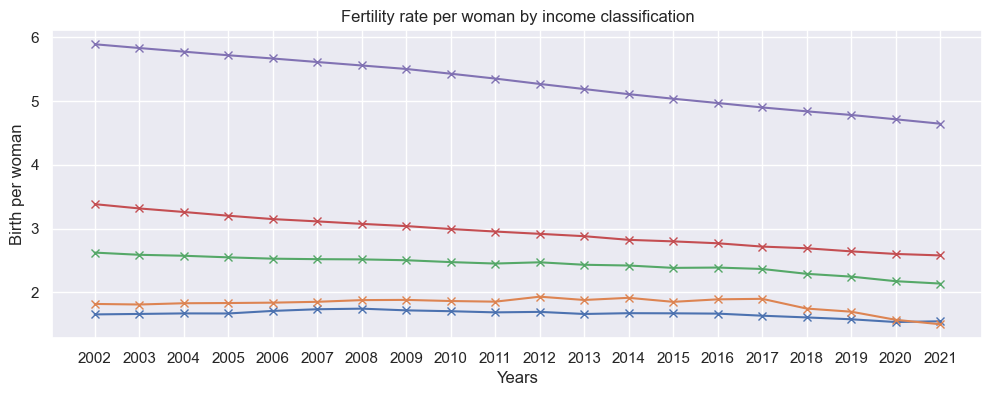

In [18]:
#Plotting
plt.figure(figsize = (12, 4))
plt.plot(w_income_ft[-20:], marker = 'x')
plt.title('Fertility rate per woman by income classification')
plt.xlabel('Years')
plt.xticks()
plt.ylabel('Birth per woman')
plt.show()

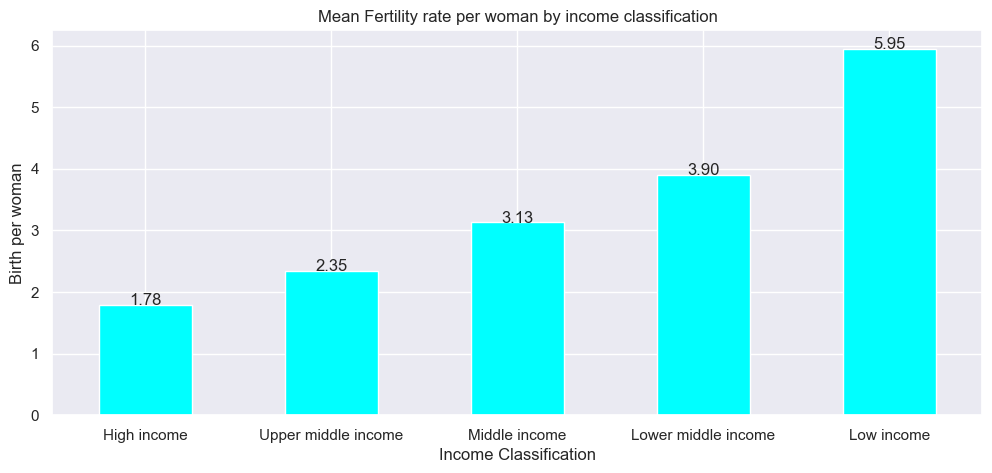

In [19]:
#Plotting Mean Fertility rate per woman by income classification
plt.figure(figsize = (12,5))
ax = w_income_ft.mean().plot(kind = 'bar', 
                        rot = 0,
                        color = 'cyan')
plt.title('Mean Fertility rate per woman by income classification')
plt.xlabel('Income Classification')
plt.ylabel('Birth per woman')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height), ha='center')


# Analysing GNI per capita

In [23]:
#Getting GNI for all the countries
w_data_gni = w_data_countries[w_data_countries['Series Name'].isin(['GNI per capita, PPP (current international $)'])]
w_data_gni.head(2)

,Country Name,Country Code,Series Name,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kenya,KEN,"GNI per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2780.0,3040.0,3390.0,3970.0,4230.0,4500.0,4720.0,4660.0,5130.0,NaN
22,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2070.0,2110.0,2150.0,2040.0,2120.0,2130.0,2200.0,2100.0,1680.0,NaN


In [24]:
#Dropping unwanted columns
w_data_gni.drop(['Country Code', 'Series Name', '2022'], axis = 1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_1732\69941904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_data_gni.drop(['Country Code', 'Series Name', '2022'], axis = 1, inplace = True)


In [25]:
#Setting Country Name as index
w_data_gni = w_data_gni.set_index('Country Name')

In [26]:
#Getting the top 20 countries by GNI
gni_top20 = w_data_gni.sort_values(by = '2021', ascending = False)[:20]
gni_top20.head()

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78420.0,78530.0,81490.0,81040.0,83960.0,88110.0,88450.0,89630.0,86340.0,102450.0
Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152630.0,150400.0,136870.0,96610.0,84380.0,91940.0,91730.0,92300.0,91910.0,100450.0
Bermuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70450.0,72180.0,71390.0,74460.0,78530.0,85190.0,86070.0,86290.0,82650.0,91950.0
Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65910.0,67670.0,67980.0,62880.0,61520.0,66400.0,72430.0,71400.0,66740.0,84260.0
Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37390.0,40340.0,43140.0,53060.0,58240.0,61730.0,65490.0,69600.0,71490.0,78650.0


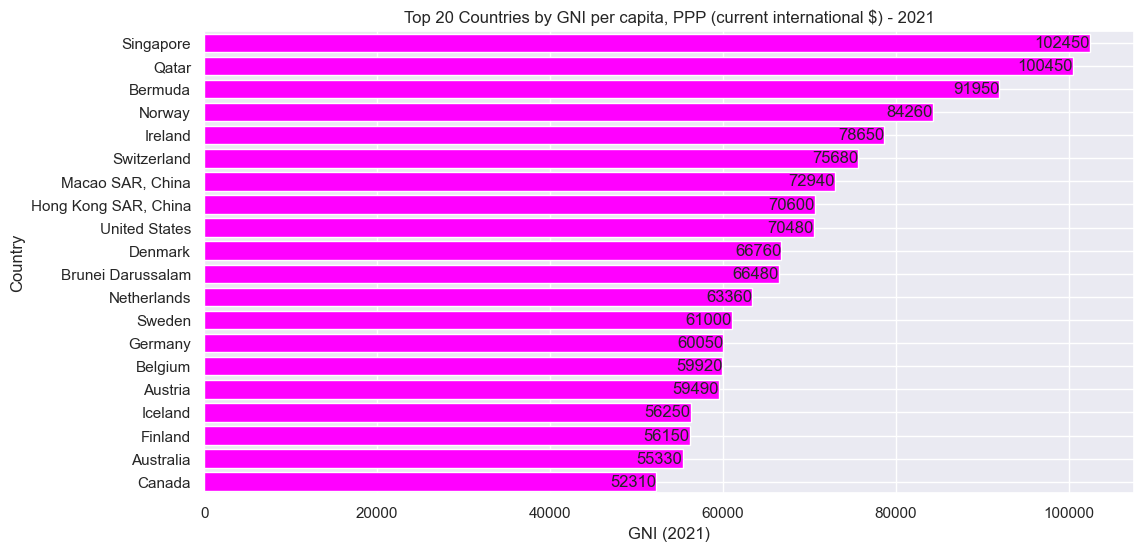

In [27]:
#Plotting Top 20 Countries by GNI (2021)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(gni_top20.index, 
         gni_top20['2021'], 
         color = 'magenta')
plt.xlabel('GNI (2021)')
plt.ylabel('Country')
plt.title('Top 20 Countries by GNI per capita, PPP (current international $) - 2021')


plt.ylim(-0.5, len(gni_top20)-0.5)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='right', va='center')
plt.show()

In [28]:
#Getting the bottom 20 countries by GNI
gni_bottom20 = w_data_gni.sort_values(by = '2021', ascending = True)[:20]
gni_bottom20.head()

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,650.0,700.0,730.0,800.0,770.0,750.0,760.0,760.0,750.0,780.0
Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,690.0,680.0,740.0,800.0,880.0,940.0,960.0,940.0,980.0
"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,620.0,670.0,750.0,810.0,910.0,990.0,1030.0,1040.0,1070.0,1110.0
Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,820.0,930.0,1080.0,1120.0,1050.0,1120.0,1180.0,1180.0,1240.0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1050.0,1090.0,1140.0,1280.0,1340.0,1250.0,1300.0,1320.0,1270.0,1320.0


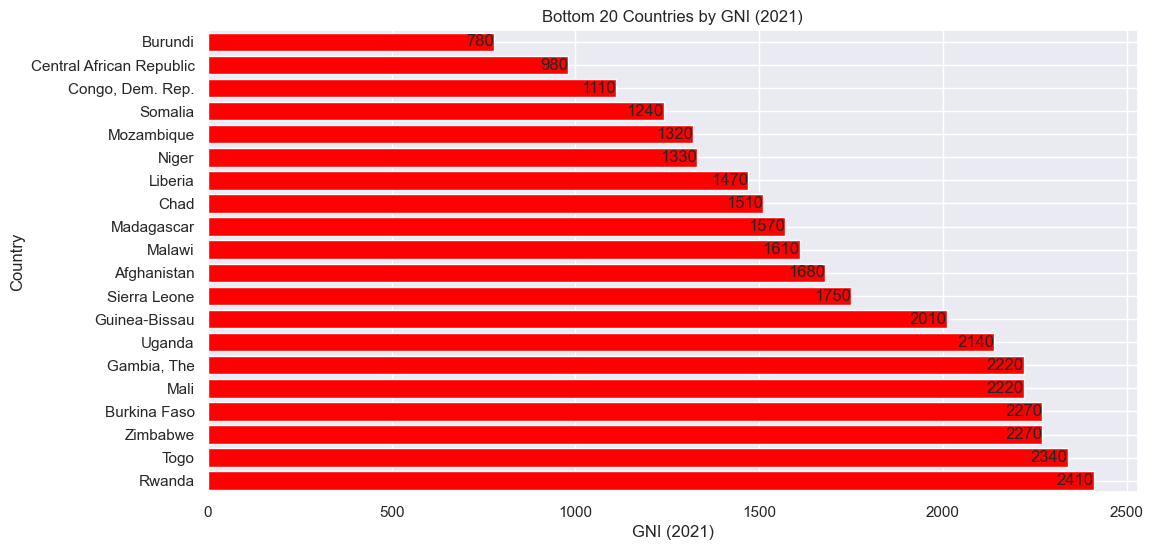

In [29]:
#Plotting Bottom 20 Countries by GNI (2021)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(gni_bottom20.index, 
         gni_bottom20['2021'], 
         color = 'red')
plt.xlabel('GNI (2021)')
plt.ylabel('Country')
plt.title('Bottom 20 Countries by GNI (2021)')


plt.ylim(-0.5, len(gni_top20)-0.5)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='right', va='center')
plt.show()

In [30]:
#Getting the top 20 countries in the last 5 years by GNI
gni_top20_last5 = gni_top20.iloc[:, -5:]
gni_top20_last5

,2017,2018,2019,2020,2021
Country Name,,,,,
Singapore,88110.0,88450.0,89630.0,86340.0,102450.0
Qatar,91940.0,91730.0,92300.0,91910.0,100450.0
Bermuda,85190.0,86070.0,86290.0,82650.0,91950.0
Norway,66400.0,72430.0,71400.0,66740.0,84260.0
Ireland,61730.0,65490.0,69600.0,71490.0,78650.0
Switzerland,68170.0,68800.0,71070.0,69410.0,75680.0
"Macao SAR, China",109460.0,116330.0,113540.0,69090.0,72940.0
"Hong Kong SAR, China",62440.0,65490.0,65240.0,62390.0,70600.0
United States,61190.0,64090.0,66120.0,64210.0,70480.0


In [36]:
#Reshaping with the transpose method
gni_top20_last5t = gni_top20_last5.transpose()
gni_top20_last5t

Country Name,Singapore,Qatar,Bermuda,Norway,Ireland,Switzerland,"Macao SAR, China","Hong Kong SAR, China",United States,Denmark,Brunei Darussalam,Netherlands,Sweden,Germany,Belgium,Austria,Iceland,Finland,Australia,Canada
2017,88110.0,91940.0,85190.0,66400.0,61730.0,68170.0,109460.0,62440.0,61190.0,56570.0,63750.0,55510.0,52850.0,54340.0,50900.0,53670.0,53920.0,47590.0,47090.0,47700.0
2018,88450.0,91730.0,86070.0,72430.0,65490.0,68800.0,116330.0,65490.0,64090.0,59080.0,61450.0,58490.0,54580.0,57010.0,52990.0,56400.0,54290.0,49780.0,48620.0,49140.0
2019,89630.0,92300.0,86290.0,71400.0,69600.0,71070.0,113540.0,65240.0,66120.0,61830.0,65730.0,60460.0,58060.0,59260.0,56280.0,59540.0,59540.0,52070.0,50180.0,49140.0
2020,86340.0,91910.0,82650.0,66740.0,71490.0,69410.0,69090.0,62390.0,64210.0,63040.0,66940.0,59050.0,57530.0,57410.0,54800.0,56940.0,53100.0,53180.0,51870.0,46600.0
2021,102450.0,100450.0,91950.0,84260.0,78650.0,75680.0,72940.0,70600.0,70480.0,66760.0,66480.0,63360.0,61000.0,60050.0,59920.0,59490.0,56250.0,56150.0,55330.0,52310.0


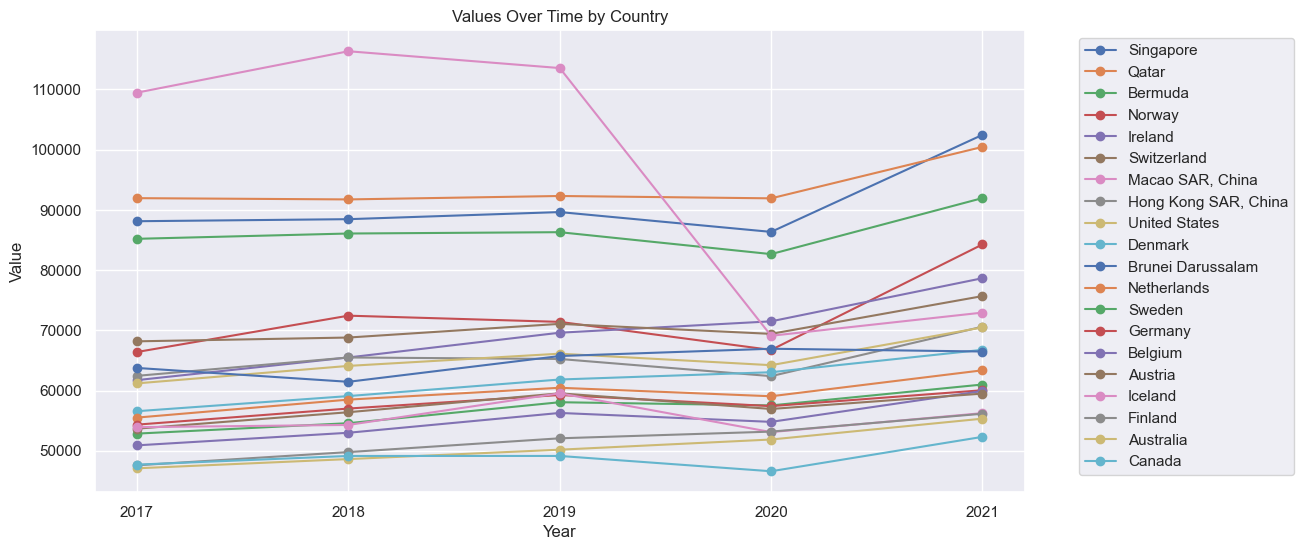

In [37]:
#Plotting the top 20 countries in the last 5 years by GNI
plt.figure(figsize=(12, 6))
plt.plot(gni_top20_last5t.index, gni_top20_last5t.values, marker='o', label=gni_top20_last5t.columns)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values Over Time by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Analysis of the mortality rate

In [39]:
#Getting the mortality rate figures
w_mortality = w_data_countries[w_data_countries['Series Name'] == 'Mortality rate, infant (per 1,000 live births)']
w_mortality = w_mortality.drop(['Country Code', 'Series Name', '2022'], axis =1)

w_mortality.head()

,Country Name,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
16,Kenya,86.5,84.3,82.0,79.7,77.3,74.9,72.6,70.5,68.5,...,37.1,36.0,34.7,33.1,32.2,31.6,30.6,29.7,29.0,28.0
38,Afghanistan,190.5,186.7,182.9,179.0,175.0,171.0,166.9,162.6,158.3,...,59.4,57.2,55.0,53.0,51.1,49.4,47.8,46.3,44.8,43.4
60,Albania,NaN,NaN,NaN,NaN,NaN,76.7,71.2,66.0,61.2,...,10.0,9.3,8.8,8.5,8.4,8.3,8.3,8.4,8.4,8.4
82,Algeria,136.2,132.3,128.0,123.4,118.7,113.6,108.1,101.9,94.8,...,22.8,22.4,22.0,21.7,21.4,21.0,20.6,20.1,19.6,19.2
104,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Setting country Name as the index of the dataset
w_mortality.set_index('Country Name')

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Kenya,86.5,84.3,82.0,79.7,77.3,74.9,72.6,70.5,68.5,66.8,...,37.1,36.0,34.7,33.1,32.2,31.6,30.6,29.7,29.0,28.0
Afghanistan,190.5,186.7,182.9,179.0,175.0,171.0,166.9,162.6,158.3,153.9,...,59.4,57.2,55.0,53.0,51.1,49.4,47.8,46.3,44.8,43.4
Albania,NaN,NaN,NaN,NaN,NaN,76.7,71.2,66.0,61.2,57.0,...,10.0,9.3,8.8,8.5,8.4,8.3,8.3,8.4,8.4,8.4
Algeria,136.2,132.3,128.0,123.4,118.7,113.6,108.1,101.9,94.8,86.3,...,22.8,22.4,22.0,21.7,21.4,21.0,20.6,20.1,19.6,19.2
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,NaN,NaN,76.8,72.7,68.9,65.4,62.0,58.9,56.0,53.2,...,17.5,16.9,17.2,15.8,15.2,14.7,14.1,13.7,13.2,12.8
"Yemen, Rep.",197.7,190.1,182.2,174.0,165.5,156.8,148.3,140.3,132.4,124.8,...,45.5,45.3,45.4,46.2,46.1,46.0,46.6,46.5,45.8,46.7


In [42]:
#Dropping nans using the 2021 figures
w_mortality.dropna(subset=['2021'], inplace=True)

In [43]:
#Selecting the top 20 countries by mortality rate in 2021
mort_top20 = w_mortality.sort_values(by = '2021', ascending = False)[:20]
mort_top20.head()

,Country Name,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3756,Sierra Leone,182.0,179.5,177.2,175.0,172.9,170.8,169.0,167.2,165.6,...,101.0,98.0,96.0,95.5,90.1,87.6,85.2,82.8,80.5,78.3
852,Central African Republic,131.6,129.7,128.0,126.3,124.7,123.2,121.7,120.6,119.5,...,87.8,86.9,85.3,83.7,82.4,81.7,80.3,78.6,77.2,75.4
3888,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.2,88.6,86.2,83.7,81.4,79.1,77.1,74.9,72.9,71.1
3184,Nigeria,153.4,148.5,143.6,139.1,135.0,131.3,128.4,126.0,124.3,...,82.0,81.1,80.2,79.3,78.3,77.1,75.5,73.9,72.3,70.6
874,Chad,128.5,127.9,127.3,126.6,126.0,125.3,124.6,123.7,122.8,...,81.0,79.3,77.8,76.1,74.5,72.7,71.0,69.3,67.6,66.0


In [46]:
#Setting Country name as the index of the column
mort_top20 = mort_top20.set_index('Country Name')
mort_top20

KeyError: "None of ['Country Name'] are in the columns"

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,182.0,179.5,177.2,175.0,172.9,170.8,169.0,167.2,165.6,163.9,...,101.0,98.0,96.0,95.5,90.1,87.6,85.2,82.8,80.5,78.3
Central African Republic,131.6,129.7,128.0,126.3,124.7,123.2,121.7,120.6,119.5,118.6,...,87.8,86.9,85.3,83.7,82.4,81.7,80.3,78.6,77.2,75.4
Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.2,88.6,86.2,83.7,81.4,79.1,77.1,74.9,72.9,71.1
Nigeria,153.4,148.5,143.6,139.1,135.0,131.3,128.4,126.0,124.3,123.1,...,82.0,81.1,80.2,79.3,78.3,77.1,75.5,73.9,72.3,70.6
Chad,128.5,127.9,127.3,126.6,126.0,125.3,124.6,123.7,122.8,121.6,...,81.0,79.3,77.8,76.1,74.5,72.7,71.0,69.3,67.6,66.0


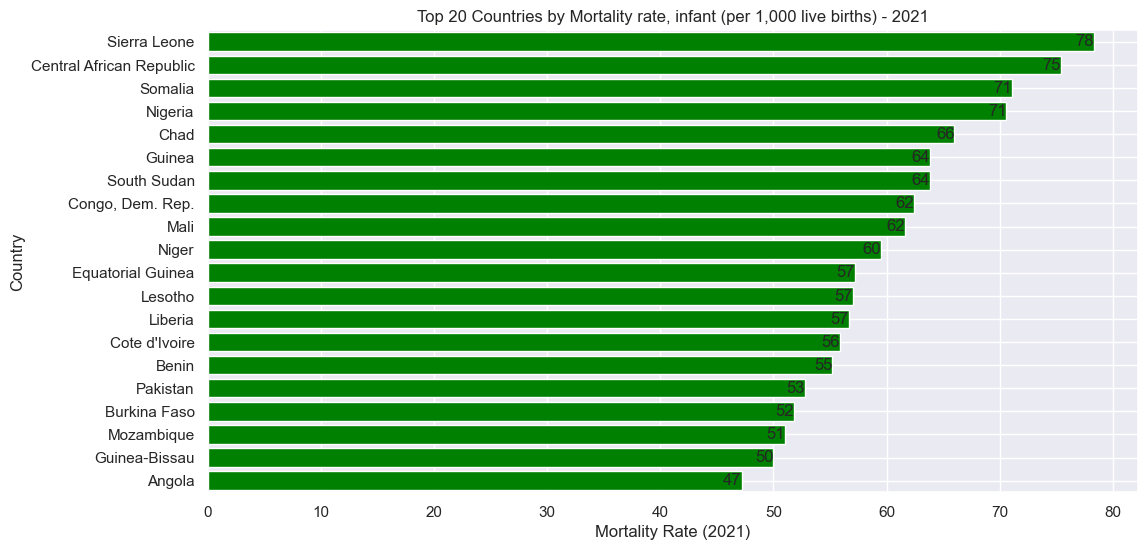

In [47]:
#Plotting Top 20 Countries by Infant mortlity rate (2021)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(mort_top20.index, 
         mort_top20['2021'], 
         color = 'green')
plt.xlabel('Mortality Rate (2021)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Mortality rate, infant (per 1,000 live births) - 2021')


plt.ylim(-0.5, len(gni_top20)-0.5)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='right', va='center')
plt.show()

### Comperative analysis of the three East African countries

In [48]:
mort_ea = w_mortality[w_mortality['Country Name'].isin(['Kenya', 'Uganda', 'Tanzania'])]
mort_ea.head()

,Country Name,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
16,Kenya,86.5,84.3,82.0,79.7,77.3,74.9,72.6,70.5,68.5,...,37.1,36.0,34.7,33.1,32.2,31.6,30.6,29.7,29.0,28.0
4218,Tanzania,121.7,119.6,117.3,114.8,112.5,110.3,108.6,107.6,107.2,...,44.1,43.0,41.9,41.0,39.7,38.2,36.8,35.9,34.9,34.1
4460,Uganda,116.1,117.8,119.9,122.2,124.8,127.0,128.5,129.6,128.9,...,44.5,42.7,41.0,39.3,37.6,36.0,34.4,33.2,32.1,31.2


Text(0, 0.5, 'Mortality rate')

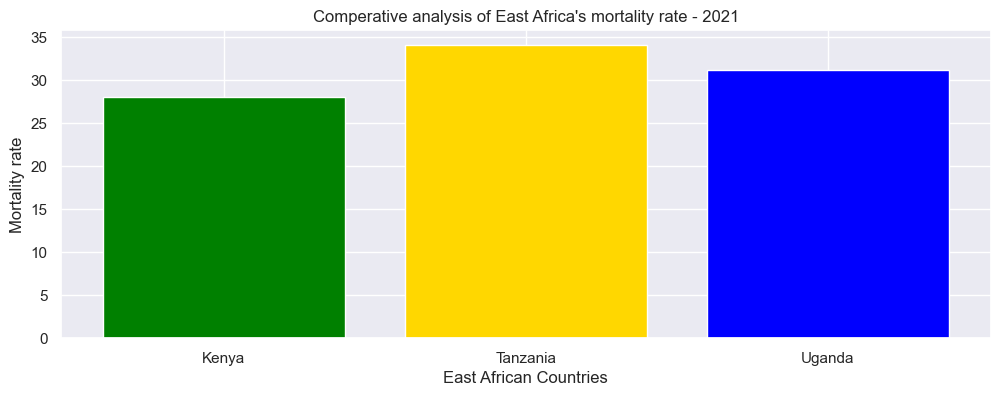

In [61]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(mort_ea['Country Name'],
         mort_ea['2021'],
        color = ['green', 'gold', 'blue'])
plt.title("Comperative analysis of East Africa's mortality rate - 2021")
plt.xlabel('East African Countries')
plt.ylabel('Mortality rate')